In [2]:
import pandas as pd
import random
from datetime import datetime, timedelta
from faker import Faker

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_theme(style="whitegrid", palette="viridis")
df = pd.read_csv('DataFrame_Complet.csv')

# Visualisations avec données DataFrame_Complet.csv

In [5]:
df_complet = pd.read_csv("DataFrame_complet.csv", usecols=["Link", "Title", "Type", "Published", "Summary", "CVE_id", "Description", "CVSS_score", "Base_severity", "EPSS_score", "EPSS_percentile", "CWE", "vendor", "product", "version"])
df_complet.head(2)

df_cve_unique = df_complet.drop(columns=['vendor', 'product', 'version'])
df_cve_unique = df_cve_unique.drop_duplicates()
df_cve_unique_full = df_cve_unique.dropna(subset=['CVSS_score', 'Base_severity'])

df_produit_unique = df_complet.drop(columns=['version'])
df_produit_unique = df_produit_unique.drop_duplicates()

## Histogramme des scores CVSS
### Observer la distribution des vulnérabilités selon leur niveau de gravité (critique, élevée, moyenne).

(array([  0.,  50., 100., 150., 200., 250.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250')])

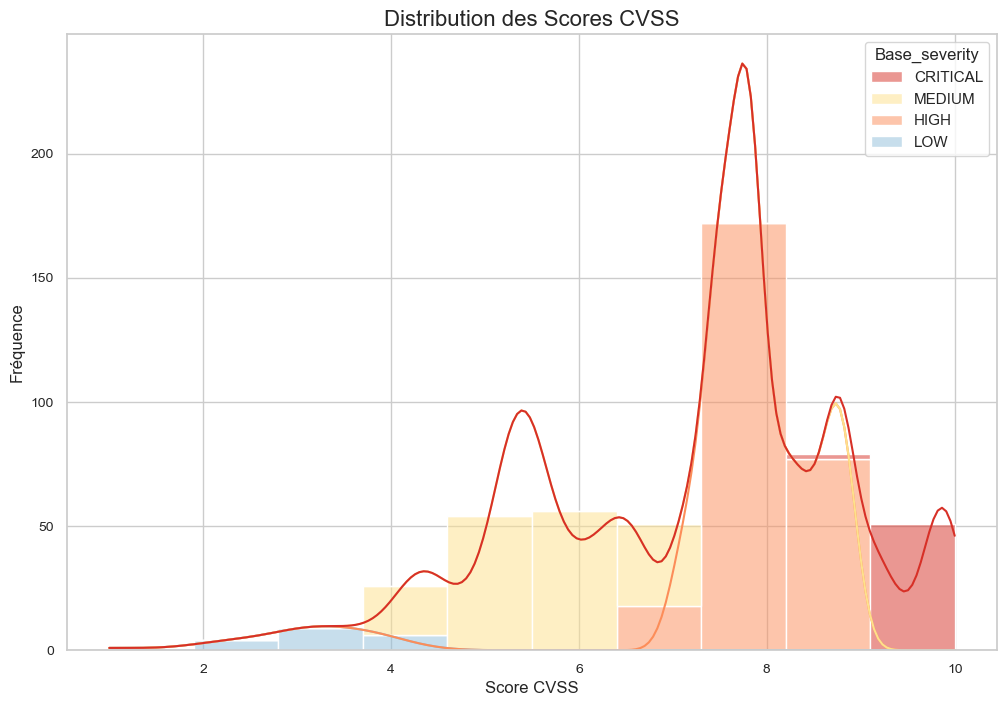

In [6]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df_cve_unique_full, x='CVSS_score', bins=10, kde=True, hue=df_cve_unique['Base_severity'], multiple='stack', palette={'CRITICAL': '#d73027', 'HIGH': '#fc8d59', 'MEDIUM': '#fee08b', 'LOW': '#91bfdb'})
plt.title('Distribution des Scores CVSS', fontsize=16)
plt.xlabel('Score CVSS', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


# Interprétation Distribution des Scores CVSS

La distribution des scores CVSS n'est pas uniforme et présente plusieurs pics, ce qui suggère que certains scores ou plages de scores soient beaucoup plus fréquents que d'autres.

Très peu de vulnérabilités ont des scores CVSS très bas (inférieurs à 2 ou 3, sévérité "LOW"). La fréquence commence à augmenter à partir d'un score d'environ 3.

Le pic le plus proéminent et le plus élevé se situe clairement autour d'un score CVSS de 8. La barre d'histogramme correspondante est la plus haute, indiquant la fréquence la plus élevée de vulnérabilités ayant des scores dans cette plage (sévérité "HIGH"). C'est la catégorie de scores la plus représentée dans le jeu de données.

Bien que le pic principal soit à 8, il y a encore un nombre significatif de vulnérabilités avec des scores très élevés, proches de 10 (sévérité "CRITICAL").
________
La majorité des vulnérabilités dans ce jeu de données semblent avoir des scores CVSS dans la plage moyenne à élevée (entre 6 et 10).

Le fait que le pic le plus important soit à 8 suggère qu'un grand nombre de vulnérabilités découvertes ou rapportées sont considérées comme "élevées" en termes de gravité selon le système CVSS.

La présence d'un deuxième pic ou d'une queue significative vers les scores les plus élevés (9-10) met en évidence l'existence d'un nombre conséquent de vulnérabilités "critiques" qui nécessitent une attention immédiate.

Les très faibles scores CVSS sont rares, ce qui pourrait s'expliquer par plusieurs facteurs : soit elles sont moins fréquentes en général, soit elles sont moins signalées/enregistrées, ou elles sont rapidement corrigées et ne figurent pas dans la base de données.

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600')])

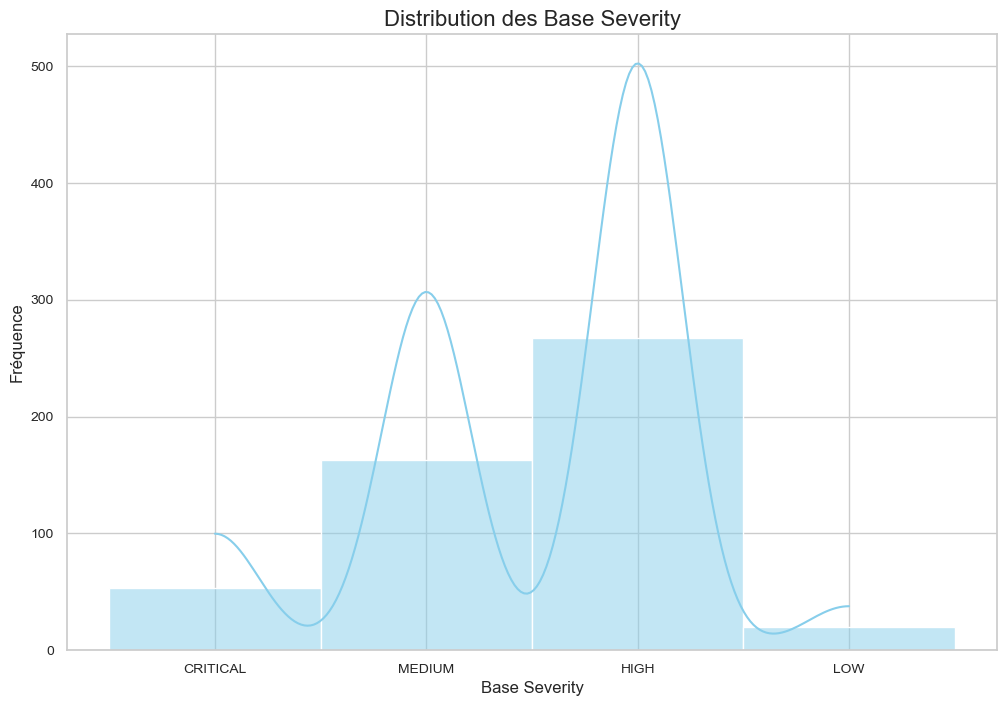

In [7]:
plt.figure(figsize=(12, 8))
sns.histplot(df_cve_unique_full['Base_severity'], bins=10, kde=True, color='skyBlue')
plt.title('Distribution des Base Severity', fontsize=16)
plt.xlabel('Base Severity', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Interpréation - Distribution des Base Severity

Ce graphique complète le précédent sur la distribution des scores CVSS.

Le pic principal des scores CVSS était autour de 8, ce qui correspond généralement à la catégorie "HIGH" (7.0-8.9 = High). Le deuxième pic des scores CVSS vers 6 correspondrait à la catégorie "MEDIUM" (4.0-6.9 = Medium). Les scores très élevés (9.0-10.0 = Critical) étaient moins fréquents, ce qui est cohérent avec le faible nombre de vulnérabilités "CRITICAL" sur ce graphique. Les scores très bas (0.1-3.9 = Low) étaient également très rares, correspondant au quasi-zéro de la catégorie "LOW".

La catégorie la plus fréquente est "HIGH", ce qui correspond bien au pic des scores CVSS autour de 8. La catégorie "MEDIUM" est également bien représentée. Les vulnérabilités "CRITICAL" sont rares, et celles de "LOW" sont presque inexistantes.

En conclusion, ce graphique indique que la majeure partie des vulnérabilités analysées sont de sévérité "HIGH", suivies par "MEDIUM", avec un nombre très limité de vulnérabilités "CRITICAL" ou "LOW".

## Diagramme circulaire des types de vulnérabilités (CWE)
### Identifier les catégories de faiblesses les plus fréquentes (par exemple : Injection SQL, Débordement de mémoire, Authentification contournée).

(np.float64(-1.0999981702258497),
 np.float64(1.0999994892207574),
 np.float64(-1.09999995768895),
 np.float64(1.0999999629971215))

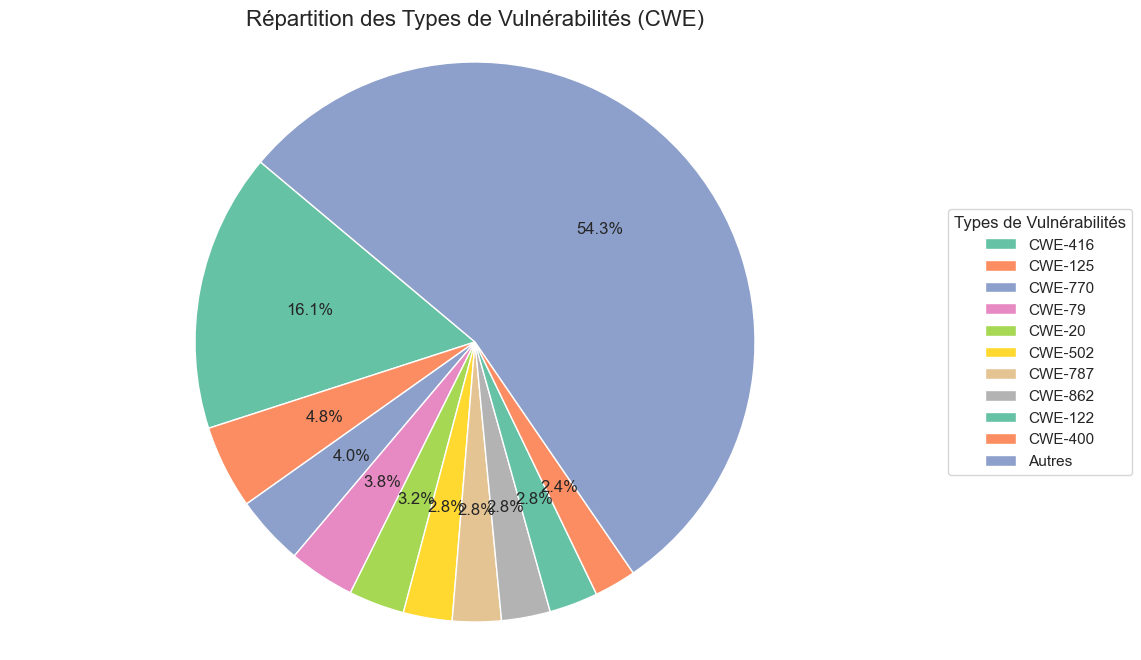

In [8]:
plt.figure(figsize=(12, 8))
cwe_counts = df_cve_unique['CWE'].value_counts()

top_n_cwe = 10
if len(cwe_counts) > top_n_cwe:
    other_cwe_count = cwe_counts.iloc[top_n_cwe:].sum()
    cwe_counts = cwe_counts.iloc[:top_n_cwe]
    cwe_counts['Autres'] = other_cwe_count

wedges, texts, autotexts = plt.pie(
    cwe_counts,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set2")
)

plt.legend(wedges, cwe_counts.index, title="Types de Vulnérabilités", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Répartition des Types de Vulnérabilités (CWE)', fontsize=16)
plt.axis('equal')

# Interprétation - Répartition des Types de Vulnérabilités (CWE)

Ce graphique circulaire montre la répartition des types de vulnérabilités (CWE). La catégorie "Autres" (Autres CWE non spécifiées ou moins fréquentes) représente la majorité des vulnérabilités, avec 54,3%. Parmi les types de CWE explicitement nommés, CWE-416 (Use After Free) est le plus courant avec 16,1%, suivi de CWE-125 (Out-of-bounds Read) à 4,8% et CWE-770 (Allocation of Resources Without Limits or Throttling) à 4,0%. Les autres vulnérabilités nommées représentent chacune moins de 4% des vulnérabilités.

# Courbe des scores EPSS
### Comprendre la probabilité d'exploitation des vulnérabilités recensées et les prioriser en fonction de leur risque réel

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7'),
  Text(0, 8.0, '8'),
  Text(0, 9.0, '9')])

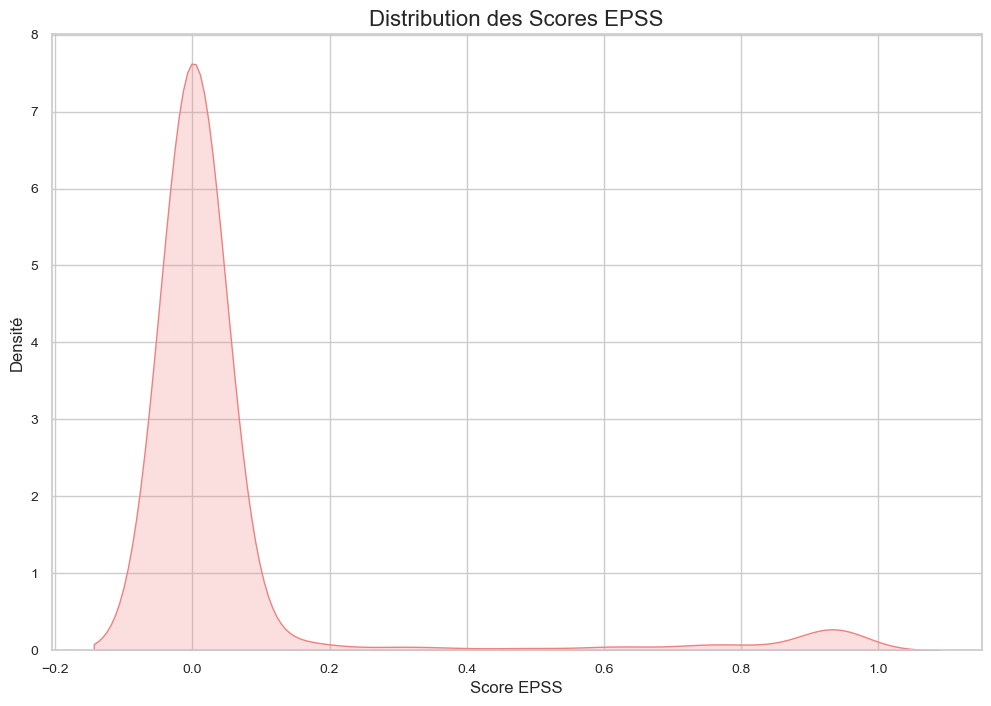

In [9]:
plt.figure(figsize=(12, 8))
sns.kdeplot(df_cve_unique['EPSS_score'], fill=True, color='lightcoral')
plt.title('Distribution des Scores EPSS', fontsize=16)
plt.xlabel('Score EPSS', fontsize=12)
plt.ylabel('Densité', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Interprétation - Courbe des scores EPSS

Ce graphique montre la distribution des Scores EPSS (Exploit Prediction Scoring System). La quasi-totalité des vulnérabilités ont des scores EPSS très bas, concentrés autour de 0. Cela signifie que, pour la plupart des vulnérabilités, la probabilité qu'elles soient exploitées en réalité est très faible. Il y a un tout petit pic secondaire vers 0.9, indiquant qu'une très petite proportion de vulnérabilités a une forte probabilité d'être exploitée.

# Classement des produits ou éditeurs les plus affectés
### Mettre en lumière les systèmes les plus vulnérables et cibler les actions à entreprendre

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Linux'),
  Text(0, 1, 'Windows Server 2022'),
  Text(0, 2, 'Windows Server 2019 (Server Core installation)'),
  Text(0, 3, 'Windows Server 2019'),
  Text(0, 4, 'Windows Server 2016 (Server Core installation)'),
  Text(0, 5, 'Windows Server 2016'),
  Text(0, 6, 'Windows Server 2025 (Server Core installation)')])

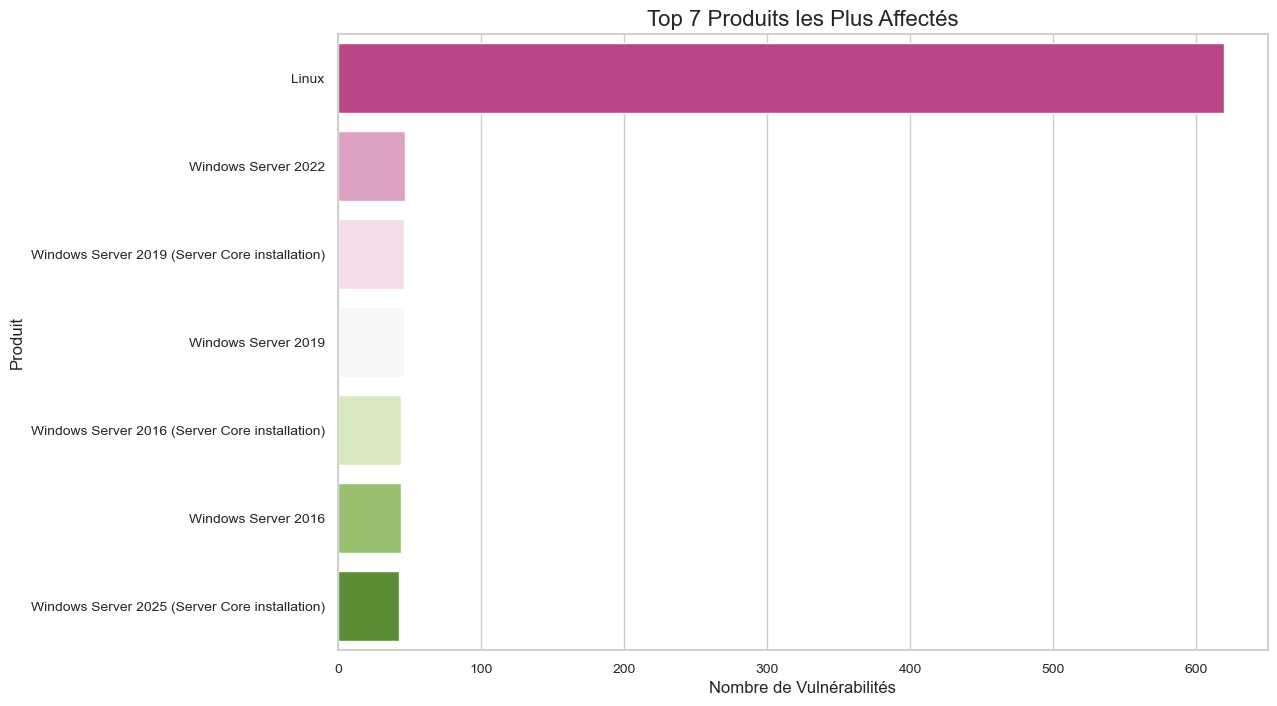

In [10]:
plt.figure(figsize=(12, 8))
top_affected_products = df_produit_unique['product'].value_counts().head(7)
sns.barplot(x=top_affected_products.values, y=top_affected_products.index, palette='PiYG', hue=top_affected_products.index, legend=False)
plt.title('Top 7 Produits les Plus Affectés', fontsize=16)
plt.xlabel('Nombre de Vulnérabilités', fontsize=12)
plt.ylabel('Produit', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Interprétation - Top 7 Produits les plus affectés

Ce graphique à barres horizontales illustre les sept produits logiciels qui ont été le plus fréquemment associés à des vulnérabilités

Avec un nombre de vulnérabilités bien au-delà de 600, Linux affiche un volume de problèmes de sécurité plus élevé que tous les autres produits combinés.

Après Linux, on observe une chute drastique du nombre de vulnérabilités. Le second produit le plus affecté, le Windows Server 2022, compte environ une cinquantaine de vulnérablités.

Les autres produits dans le top 7 sont des systèmes d'exploitation serveurs de Microsoft (Windows Server 2022, Windows Server 2019, et Windows Server 2016). Ces produits montrent des nombres de vulnérabilités relativement faibles et assez similaires entre eux.
________
La position de Linux pourrait s'expliquer par plusieurs facteurs. Linux est un vaste écosystème qui englobe le noyau, des milliers de paquets logiciels, des distributions variées et est utilisé dans une multitude de contextes (serveurs, embarqué, IoT, postes de travail). Sa popularité et sa complexité inhérente augmentent statistiquement la probabilité de découvrir des vulnérabilités.

Les produits Windows Server, bien que critiques pour de nombreuses infrastructures, sont des solutions plus spécifiques et potentiellement moins hétérogènes que l'ensemble de l'écosystème Linux.

# Heatmap des corrélations entre CVSS et EPSS
## Analyser la relation entre le score CVSS (niveau de gravité) et le score EPSS (probabilité d'exploitation)

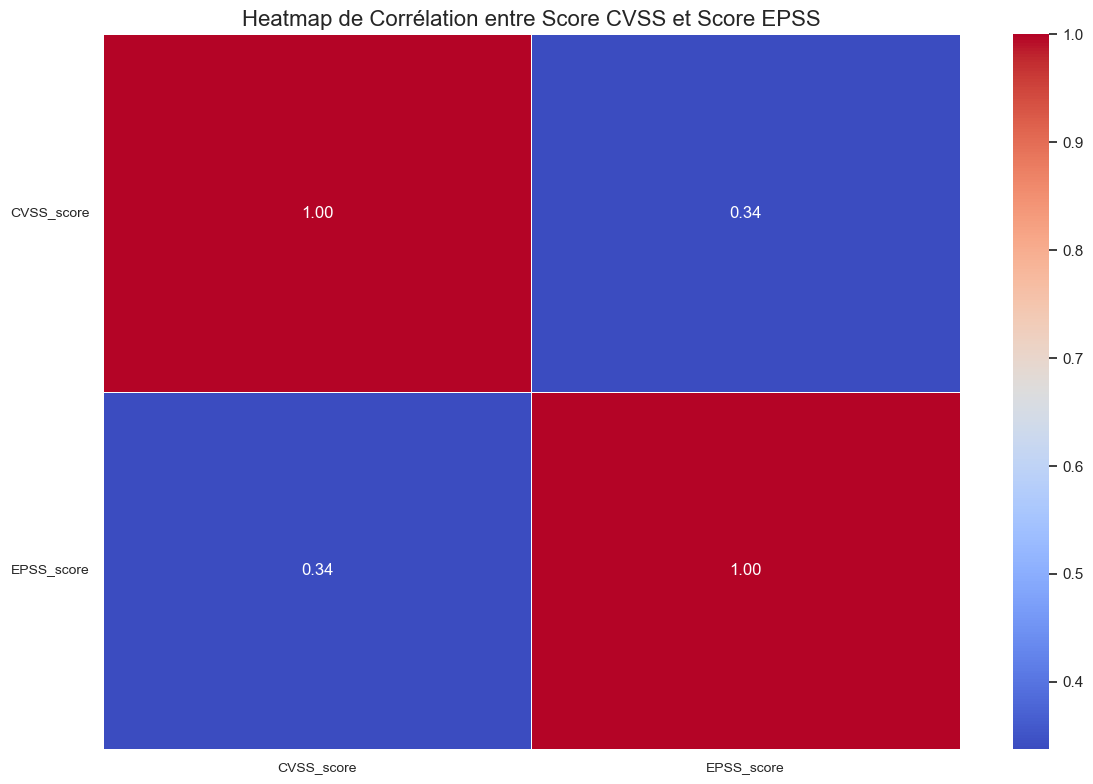

In [11]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_cve_unique[['CVSS_score', 'EPSS_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Corrélation entre Score CVSS et Score EPSS', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)

plt.tight_layout()
plt.show()

# Interprétation - Heatmap des corrélations entre CVSS et EPSS

Une corrélation de 0,34 entre le score CVSS et EPSS indique que lorsque le premier augmente, l'autre a tendance à augmenter avec lui, et vice-versa. Cela signifie que les vulnérabilités jugées techniquement plus graves (CVSS élevé) ont une légère tendance à avoir une probabilité d'exploitation plus élevée.

La heatmap montre donc que le score de gravité technique d'une vulnérabilité (CVSS) et la probabilité de son exploitation (EPSS) sont positivement corrélés, mais seulement de manière modérée. Cela signifie que le score CVSS est un indicateur de la gravité technique, mais il ne suffit pas à lui seul pour prédire avec une grande précision la probabilité qu'une vulnérabilité soit activement exploitée dans la nature. L'EPSS offre donc une information complémentaire cruciale pour prioriser les efforts de remédiation en se basant sur le risque réel d'exploitation.

# Nuage de points entre Score CVSS et Score EPSS
### Visualiser comment la probabilité d'exploitation (EPSS) évolue par rapport au niveau de gravité (CVSS)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0')])

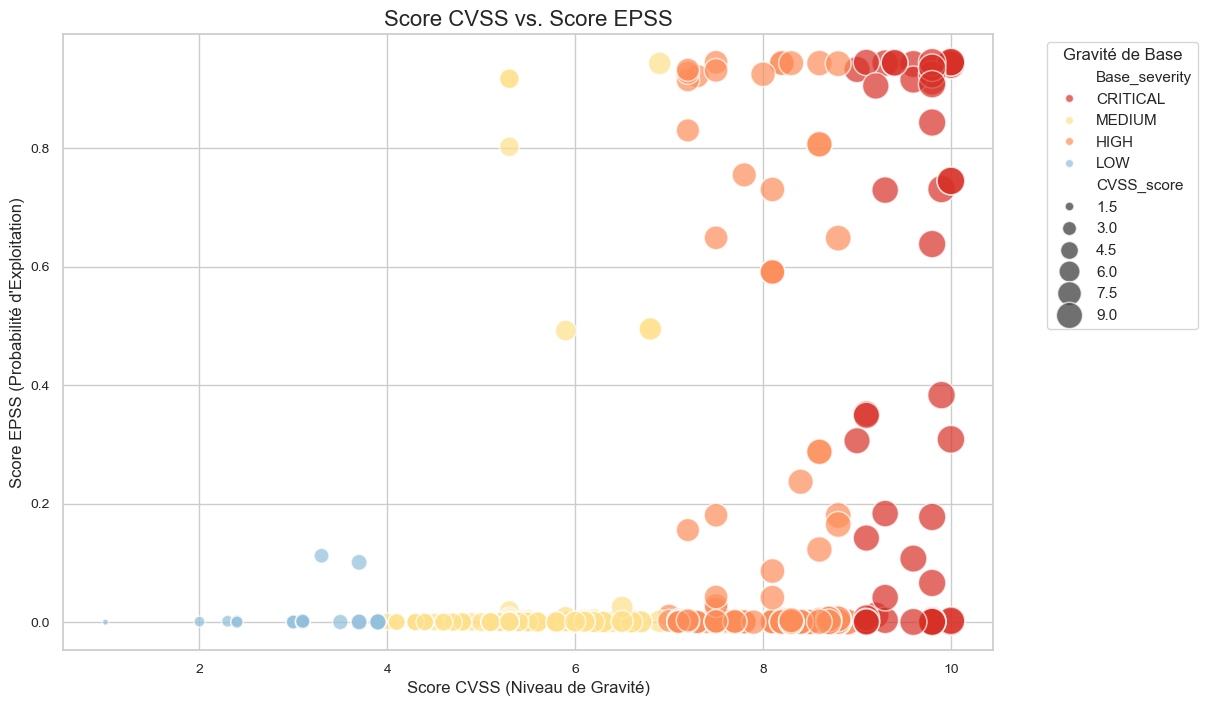

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cve_unique, x='CVSS_score', y='EPSS_score', hue='Base_severity',
                size='CVSS_score', sizes=(20, 400), alpha=0.7, palette={'CRITICAL': '#d73027', 'HIGH': '#fc8d59', 'MEDIUM': '#fee08b', 'LOW': '#91bfdb'})
plt.title('Score CVSS vs. Score EPSS', fontsize=16)
plt.xlabel('Score CVSS (Niveau de Gravité)', fontsize=12)
plt.ylabel('Score EPSS (Probabilité d\'Exploitation)', fontsize=12)
plt.legend(title='Gravité de Base', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Interprétation - Nuage de points entre Score CVSS et Score EPSS

Il s'agit d'un nuage de points qui explore la relation entre le Score CVSS (niveau de gravité) et le Score EPSS (probabilité d'exploitation). Les points sont codés par couleur selon la "Gravité de Base" (Base_severity) et par taille selon le "CVSS_score".

La majorité écrasante des points se situent sur l'axe des X, avec un Score EPSS très proche de 0. Cela signifie que pour la plupart des vulnérabilités, quelle que soit leur gravité CVSS, la probabilité d'exploitation réelle (selon l'EPSS) est extrêmement faible. C'est une observation cohérente avec l'analyse du graphique de distribution des Scores EPSS précédent.

Pour les scores CVSS allant de 0 à environ 6, tous les points ont un Score EPSS quasi nul. Cela suggère que les vulnérabilités de gravité faible à moyenne selon le CVSS ont très rarement une probabilité d'exploitation significative. Les couleurs (principalement "MEDIUM" en jaune, et quelques "LOW" en bleu) confirment cette observation.

On observe une tendance générale où les scores EPSS augmentent à mesure que le score CVSS augmente, surtout au-delà de 7. Les points avec des EPSS élevés sont principalement orange ("HIGH") et rouges ("CRITICAL"), ce qui est logique puisque ces catégories correspondent aux scores CVSS les plus élevés.

Même pour des CVSS très élevés (par exemple, autour de 8-10), il y a une grande dispersion des scores EPSS. Certains points ont des EPSS très bas (proches de 0), tandis que d'autres atteignent des valeurs élevées (jusqu'à 1.0). Cela renforce l'idée d'une corrélation positive modérée, comme vu dans le heatmap précédent (0.34). La gravité technique (CVSS) n'est pas le seul déterminant de la probabilité d'exploitation (EPSS).

La taille des points confirme la gravité : les plus gros points (CVSS élevé) sont ceux qui montrent le plus de variabilité dans leur score EPSS, s'étendant verticalement vers des valeurs EPSS plus élevées.

En conclusion, ce graphique met en évidence la complémentarité des scores CVSS et EPSS. La majorité des vulnérabilités ne sont pas exploitées. Cependant, parmi les vulnérabilités les plus graves (CVSS élevé), seule une partie d'entre elles présente une forte probabilité d'exploitation réelle, soulignant l'importance de l'EPSS pour une priorisation efficace des menaces.

# Courbe cumulative des vulnérabilités en fonction du temps
### Montrer l’évolution temporelle du nombre de vulnérabilités détectées

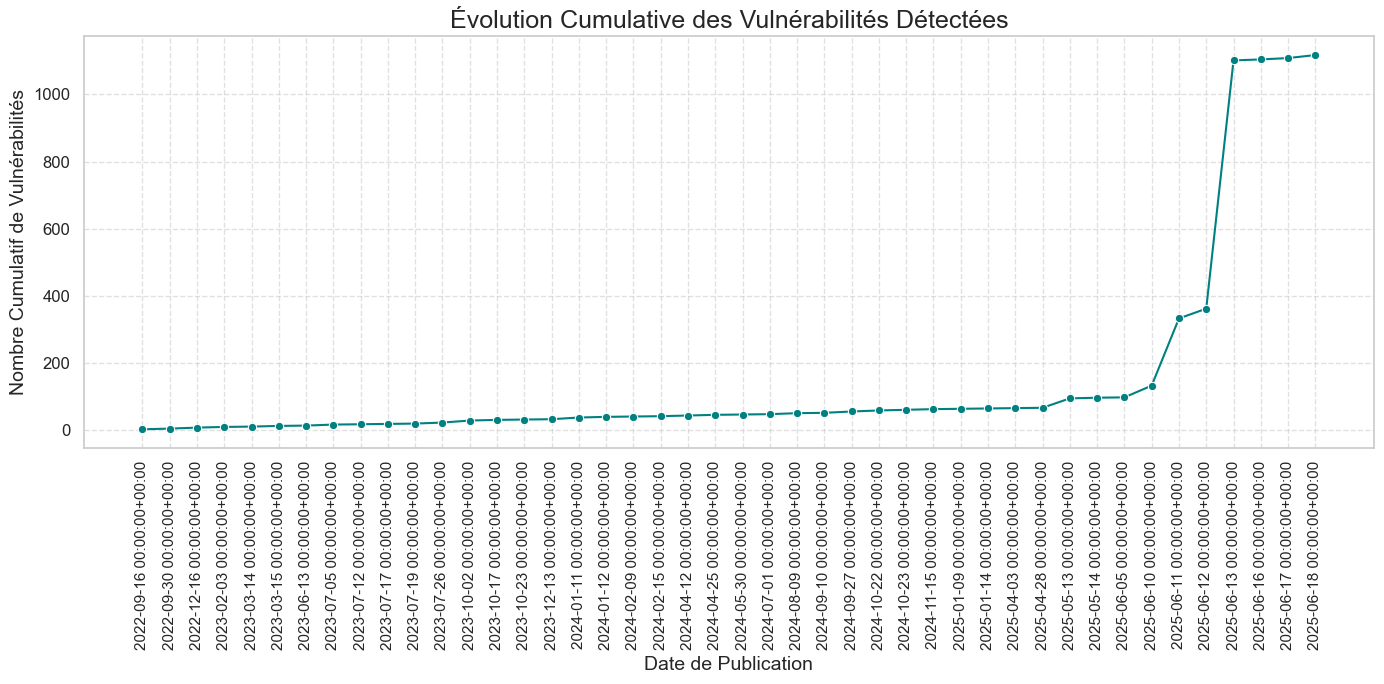

In [13]:
import matplotlib.dates as mdates

# Sort by date
df_sorted_by_date = df_cve_unique.sort_values('Published')
df_sorted_by_date['Cumulative Vulnérabilités'] = range(1, len(df_sorted_by_date) + 1)

cumulative_df = df_sorted_by_date.groupby('Published').size().reset_index(name='Daily Vulnerabilities')
cumulative_df['Cumulative Vulnérabilités'] = cumulative_df['Daily Vulnerabilities'].cumsum()

plt.figure(figsize=(14, 7))

sns.lineplot(data=cumulative_df, x='Published', y='Cumulative Vulnérabilités',
             marker='o', linestyle='-', color='teal') # Changed linestyle for visual distinction

plt.title('Évolution Cumulative des Vulnérabilités Détectées', fontsize=18)
plt.xlabel('Date de Publication', fontsize=14)
plt.ylabel('Nombre Cumulatif de Vulnérabilités', fontsize=14)

# Y-axis ticks
plt.yticks(fontsize=12)
plt.xticks(rotation=90)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Interprétation - Evolution Cumulative des Vulnérabilités Détectées

L'augmentation soudaine et spectaculaire du nombre de vulnérabilités en juin 2025 (autour des 5 et 18 juin) suggère fortement une importation massive de données ou une mise à jour majeure de la base de données plutôt qu'une découverte organique et progressive de vulnérabilités.

La section initiale à croissance lente pourrait représenter des vulnérabilités ajoutées au fur et à mesure, ou il s'agit d'une base de données qui a été alimentée progressivement avant une intégration plus large.

La date du 5 au 13 juin 2025 marque un point de bascule où le volume d'informations sur les vulnérabilités dans le système a été multiplié par un facteur très important (près de 10 fois).

# Boxplot des scores CVSS par éditeurs
### Montrer la dispersion des scores CVSS pour les éditeurs les plus affectés

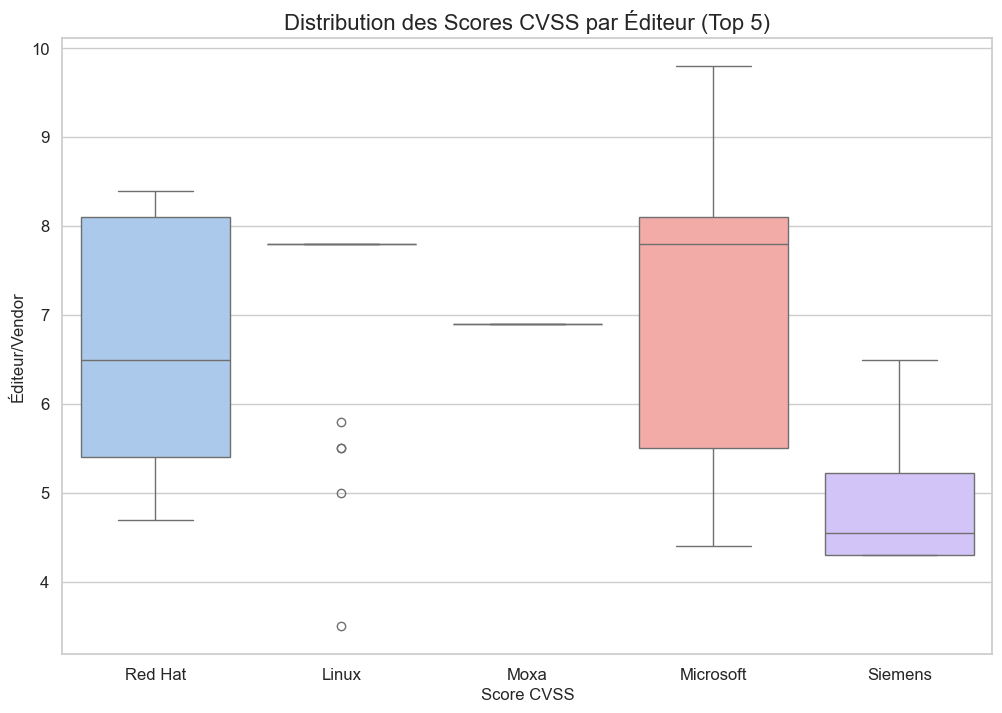

In [14]:
top_n_vendors = df_produit_unique['vendor'].value_counts().head(5).index
df_top_vendors = df_produit_unique[df_produit_unique['vendor'].isin(top_n_vendors)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_vendors, x='vendor', y='CVSS_score', hue='vendor', palette='pastel', legend=False)
plt.title('Distribution des Scores CVSS par Éditeur (Top 5)', fontsize=16)
plt.xlabel('Score CVSS', fontsize=12)
plt.ylabel('Éditeur/Vendor', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Interprétation - Boxplot des scores CVSS par éditeurs !!! à refaire

1. Red Hat :

- Médiane : Autour de 5.9-6.0.
- Plage principale (IQR) : De ~5.3 (Q1) à ~7.8 (Q3).
- Moustaches : S'étendent d'environ 4.7 à 8.5.
-  La majorité des vulnérabilités de Red Hat se situent dans la catégorie "MEDIUM" selon les classifications CVSS standard (4.0-6.9). La distribution est relativement centrée avec une légère asymétrie vers les scores plus élevés.

2. Linux

- Il n'y a pas de boîte visible, seulement une ligne médiane et quelques points aberrants. La médiane est d'environ 7.8.
- Cela est très inhabituel pour un boxplot. L'absence de boîte (IQR très étroit ou inexistant) et la présence de points aberrants suggèrent que presque toutes les vulnérabilités de Linux ont le même score CVSS ou un score très similaire (autour de 7.8), avec quelques exceptions (outliers) à des scores inférieurs (3.5, 5.0, 5.8). Cela pourrait indiquer un problème dans les données ou une particularité dans la manière dont les scores CVSS sont attribués ou agrégés pour Linux dans ce jeu de données spécifique.

3. Microsoft

- Médiane : Autour de 6.7-6.8.
- Plage principale (IQR) : De ~5.5 (Q1) à ~8.1 (Q3).
- Moustaches : S'étendent d'environ 4.4 à 9.5.
- Les vulnérabilités de Microsoft sont globalement plus graves que celles de Red Hat, avec une médiane plus élevée et une distribution qui s'étend davantage vers les scores "HIGH" (7.0-8.9).

4. Siemens :

- Médiane : Autour de 4.5.
- Plage principale (IQR) : De ~4.3 (Q1) à ~5.2 (Q3).
- Moustaches : S'étendent d'environ 4.0 à 6.5.
- Les vulnérabilités de Siemens montrent la gravité la plus faible parmi les éditeurs présentés. La majorité se situe dans la plage "MEDIUM" mais vers le bas de cette catégorie, et même dans la catégorie "LOW" (0.1-3.9) pour les scores minimum. C'est une distribution clairement orientée vers des gravités moindres.

5. Cisco :

- Médiane : Autour de 7.9.
- Plage principale (IQR) : De ~6.0 (Q1) à ~8.6 (Q3).
- Moustaches : S'étendent d'environ 4.8 à 10.0.
- Les vulnérabilités de Cisco affichent la gravité la plus élevée parmi tous les éditeurs, avec la médiane la plus haute et une distribution qui s'étend jusqu'à des scores de 10.0 ("CRITICAL"). La majorité de leurs vulnérabilités sont dans les catégories "HIGH" et "CRITICAL".
_________________
Comparaison Générale :

- Les vulnérabilités de Cisco et Linux (si l'on ignore le comportement étrange du boxplot Linux) ont tendance à avoir les scores CVSS médians les plus élevés, suggérant une prépondérance de vulnérabilités de haute gravité.
- Siemens se distingue par des vulnérabilités de gravité globalement plus faible.
- Microsoft et Red Hat se situent entre ces extrêmes, avec Microsoft ayant des vulnérabilités légèrement plus graves en moyenne que Red Hat.
- Cisco et Microsoft montrent une plus grande dispersion de leurs scores CVSS (boîtes plus hautes), ce qui indique une plus grande variété dans la gravité de leurs vulnérabilités. Linux, en revanche, montre une variance extrêmement faible (ou nulle) si le graphique est à interpréter littéralement, ce qui est très surprenant.

# Visualisations particulières pour un type défini CWE
### CWE-79 - 'Cross-Site Scriping'

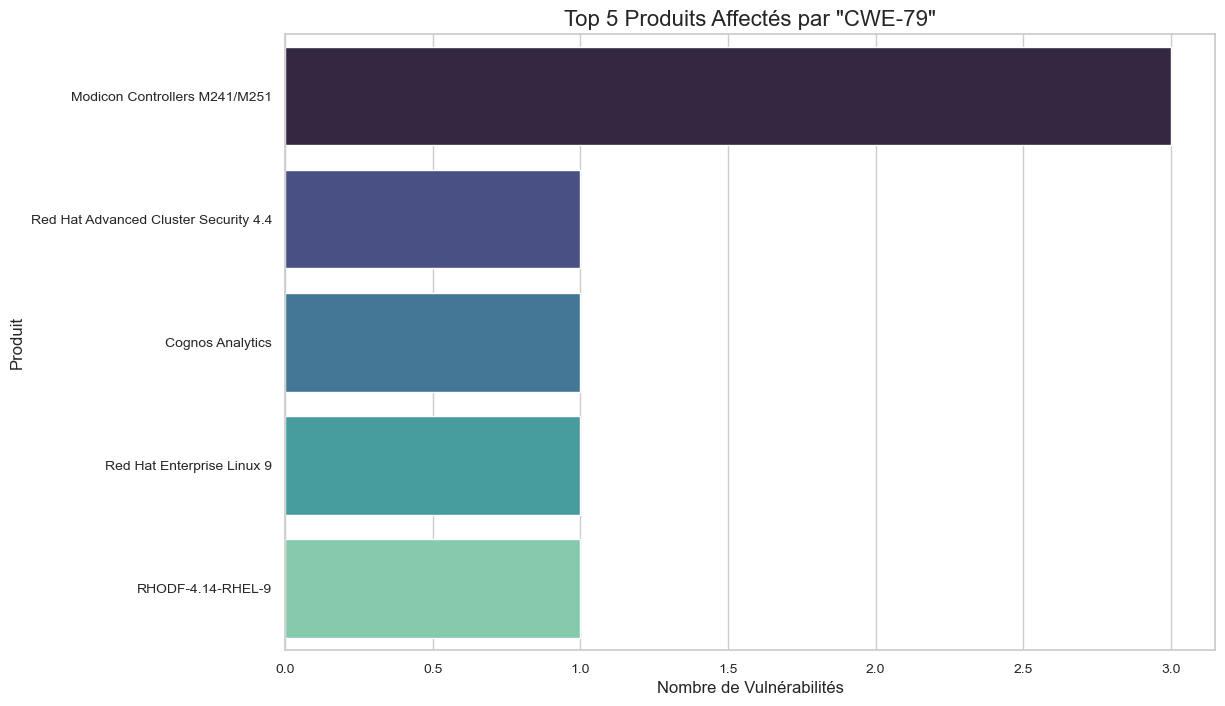

In [15]:
plt.figure(figsize=(12, 8))
specific_cwe = 'CWE-79'
df_specific_cwe = df_produit_unique[df_produit_unique['CWE'] == specific_cwe]

if not df_specific_cwe.empty:
    affected_products_cwe = df_specific_cwe['product'].value_counts().head(5)
    sns.barplot(x=affected_products_cwe.values, y=affected_products_cwe.index, hue=affected_products_cwe.index, legend=False, palette='mako')
    plt.title(f'Top 5 Produits Affectés par "{specific_cwe}"', fontsize=16)
    plt.xlabel('Nombre de Vulnérabilités', fontsize=12)
    plt.ylabel('Produit', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
else:
    plt.text(0.5, 0.5, f'No data for CWE: "{specific_cwe}"', horizontalalignment='center',
             verticalalignment='center', transform=plt.gca().transAxes, fontsize=15)
    plt.title(f'Top 5 Produits Affectés par "{specific_cwe}"', fontsize=16)

# Interprétation - Top 5 Produits Affectés par CWE-79 !!! à refaire

- Red Hat OpenShift AI (RHOAI) : Ce produit est clairement le plus affecté par les vulnérabilités CWE-79, avec 13 vulnérabilités de ce type. Cela le place en tête de liste.

- Cognos Analytics : En deuxième position, Cognos Analytics est affecté par 11 vulnérabilités de type CWE-79, un nombre significatif mais légèrement inférieur à RHOAI.

- SAPUI5 applications : Ce produit se situe en troisième position avec 7 vulnérabilités CWE-79.

- Red Hat OpenShift distributed tracing 3 : Également avec 7 vulnérabilités CWE-79, ce produit partage la troisième place avec SAPUI5 applications.

- RHODF-4.14-RHEL-9 : Ce produit ferme la marche avec 6 vulnérabilités CWE-79.

### CWE-89 - 'Injection SQL'

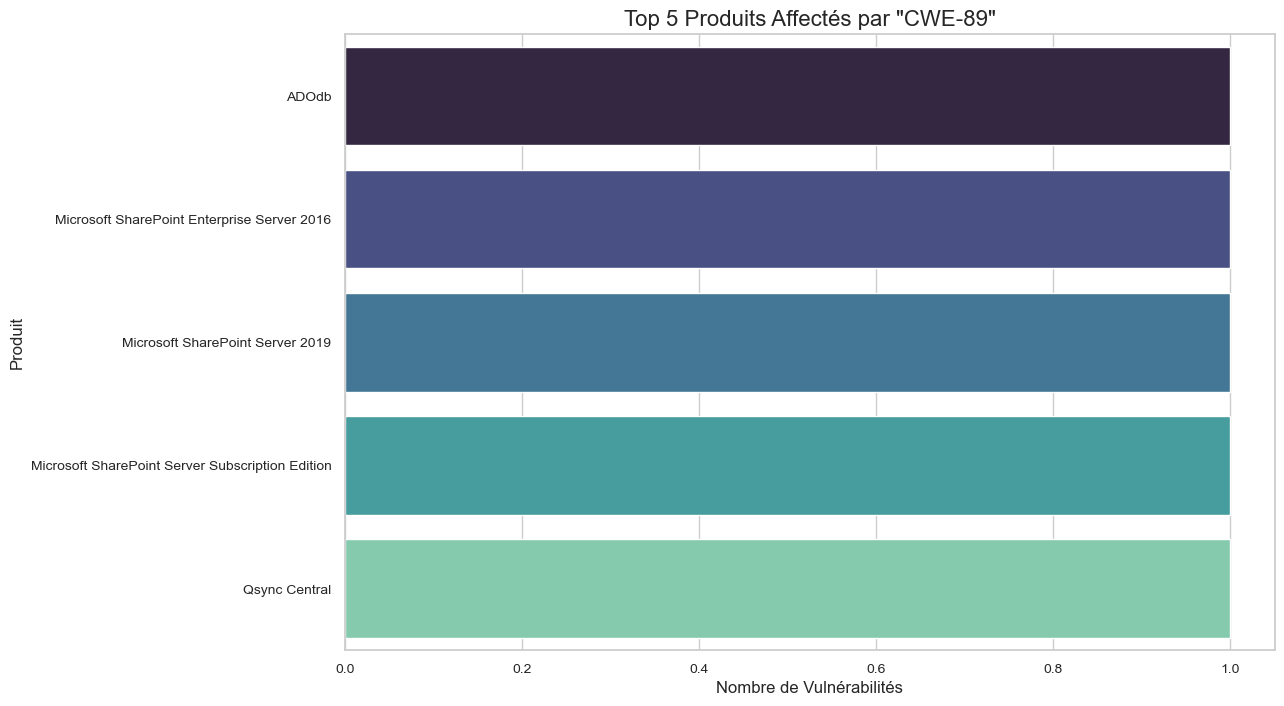

In [16]:
plt.figure(figsize=(12, 8))
specific_cwe = 'CWE-89'
df_specific_cwe = df_produit_unique[df_produit_unique['CWE'] == specific_cwe]

if not df_specific_cwe.empty:
    affected_products_cwe = df_specific_cwe['product'].value_counts().head(5)
    sns.barplot(x=affected_products_cwe.values, y=affected_products_cwe.index, hue=affected_products_cwe.index, legend=False, palette='mako')
    plt.title(f'Top 5 Produits Affectés par "{specific_cwe}"', fontsize=16)
    plt.xlabel('Nombre de Vulnérabilités', fontsize=12)
    plt.ylabel('Produit', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
else:
    plt.text(0.5, 0.5, f'No data for CWE: "{specific_cwe}"', horizontalalignment='center',
             verticalalignment='center', transform=plt.gca().transAxes, fontsize=15)
    plt.title(f'Top 5 Produits Affectés par "{specific_cwe}"', fontsize=16)

# Interprétation - Top 5 Produits affectés par CWE-89 !!! à refaire

- La découverte de 13 vulnérabilités de type SQL Injection dans moveit_transfer est extrêmement préoccupante.  Ce nombre élevé suggère une faiblesse architecturale ou de développement significative concernant la sécurisation des interactions avec la base de données pour ce produit.
- La présence de vulnérabilités CWE-89 (SQL Injection) dans plusieurs versions de Microsoft SharePoint (Enterprise Server 2016, Server 2019, Subscription Edition) est notable, même si le nombre est bien moindre que pour moveit_transfer. SharePoint est une plateforme largement utilisée pour la collaboration et la gestion de contenu, ce qui rend ces vulnérabilités critiques en raison du potentiel impact sur un grand nombre d'organisations. Le fait que plusieurs versions soient touchées indique un problème persistant.
- La présence de Qsync Central avec 2 vulnérabilités de ce type montre que d'autres logiciels, potentiellement liés à la synchronisation ou au stockage de fichiers, peuvent également être vulnérables aux injections SQL.
- L'injection SQL reste une menace majeure, particulièrement pour les produits de transfert de données.

# Montrer l'évolution temporelle du nombre de vulnérabilités détectées (mensuelle)

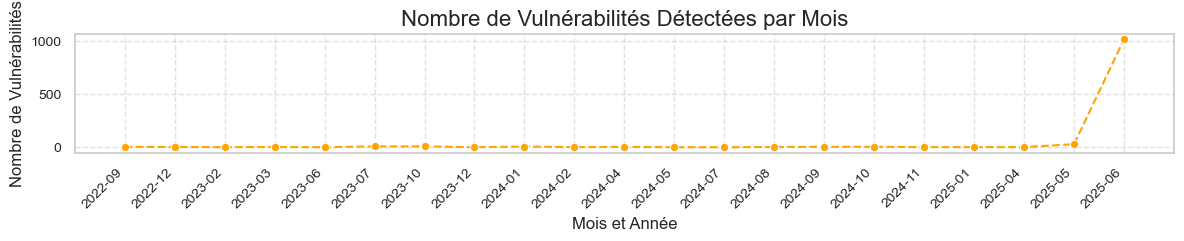

In [17]:
df_cve_unique['Published'] = pd.to_datetime(df_cve_unique['Published'], errors='coerce')
df_cve_unique.dropna(subset=['Published'], inplace=True)
df_cve_unique['Mois_Année'] = df_cve_unique['Published'].dt.tz_localize(None).dt.to_period('M')

monthly_counts = df_cve_unique['Mois_Année'].value_counts().sort_index()
monthly_counts_df = monthly_counts.rename_axis('Mois_Année').reset_index(name='Nombre de Vulnérabilités')
monthly_counts_df['Mois_Année'] = monthly_counts_df['Mois_Année'].astype(str)

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 3)
sns.lineplot(data=monthly_counts_df, x='Mois_Année', y='Nombre de Vulnérabilités', marker='o', linestyle='--', color='orange')
plt.title('Nombre de Vulnérabilités Détectées par Mois', fontsize=16)
plt.xlabel('Mois et Année', fontsize=12)
plt.ylabel('Nombre de Vulnérabilités', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Interprétation - Nombre de vulnérabilités détectées par mois

- Pendant la majeure partie de la période observée, de septembre 2022 jusqu'à mai 2025, le nombre de vulnérabilités détectées chaque mois est relativement faible et stable. Il oscille généralement entre 0 et quelques dizaines, avec de très légères fluctuations.
- La caractéristique la plus frappante et dominante du graphique est l'énorme augmentation du nombre de vulnérabilités détectées en juin 2025. Le nombre passe de quelques centaines à plus de 1000 vulnérabilités en un seul mois. C'est une augmentation sans précédent par rapport aux mois précédents.
- Une telle augmentation n'est pas le reflet d'une détection organique de vulnérabilités sur un seul mois. Il est hautement probable que ce pic soit le résultat d'une importation massive ou d'une synchronisation d'une grande base de données de vulnérabilités.

# Analyser le nombre de vulnérabilités par éditeur et distinguer les types de bulletins (avis ou alertes)

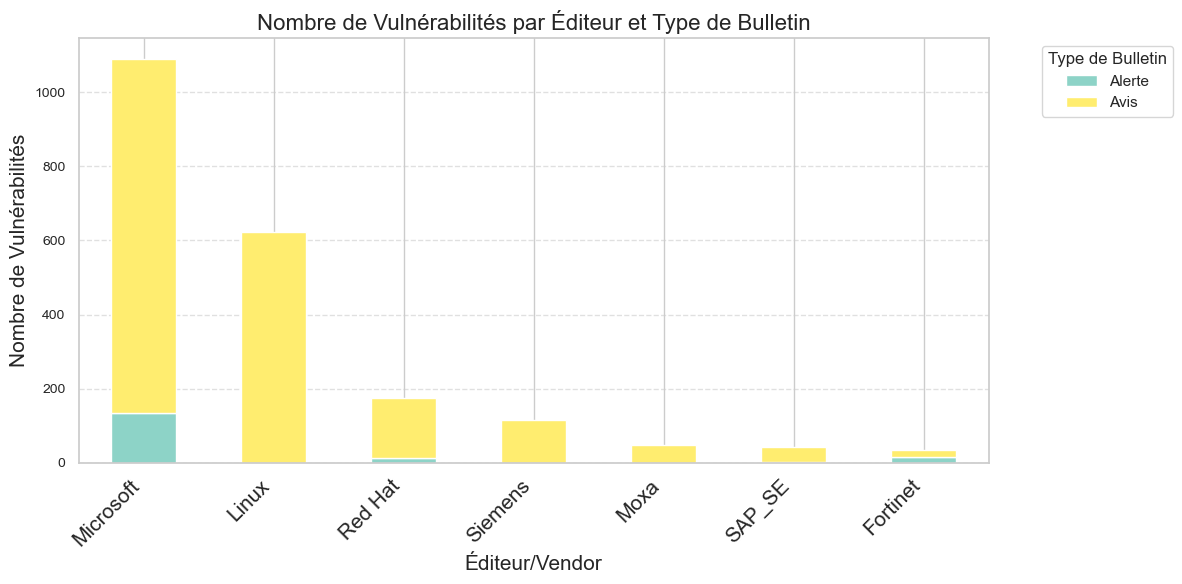

In [18]:
df_filtered_bulletins = df_produit_unique[df_produit_unique['Type'].isin(['Avis', 'Alerte'])]
# Count vulnerabilities by vendor and bulletin type
vendor_bulletin_counts = df_filtered_bulletins.groupby(['vendor', 'Type']).size().unstack(fill_value=0)

# Sort by total vulnerabilities for better visualization if needed, or by one type
vendor_bulletin_counts['Total'] = vendor_bulletin_counts.sum(axis=1)
vendor_bulletin_counts = vendor_bulletin_counts.sort_values('Total', ascending=False).head(7) # Top 7 vendors by total
vendor_bulletin_counts = vendor_bulletin_counts.drop(columns='Total')

plt.figure(figsize=(12, 8))
vendor_bulletin_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3', ax=plt.gca())
plt.title('Nombre de Vulnérabilités par Éditeur et Type de Bulletin', fontsize=16)
plt.xlabel('Éditeur/Vendor', fontsize=15)
plt.ylabel('Nombre de Vulnérabilités', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=10)
plt.legend(title='Type de Bulletin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Interprétation - Nombre de vulnérabilités par éditeur et type de bulletin !!! à refaire

- Ce graphique renforce l'observation du graphique précédent sur le "Top 7 Produits les Plus Affectés" : Linux est de loin l'éditeur avec le plus grand nombre de vulnérabilités, suivies par Microsoft. Dans les deux cas, la grande majorité de ces vulnérabilités sont classées comme des "Avis". Les "Avis" peuvent être interprétés comme des informations générales sur des vulnérabilités découvertes, ne nécessitant pas une action immédiate et urgente comme une "Alerte".
- En contraste, Cisco a un nombre substantiel de vulnérabilités qui sont des "Alertes". Cela pourrait indiquer que les vulnérabilités liées à Cisco sont souvent jugées plus critiques ou nécessitant une attention plus urgente de la part des administrateurs, ou que la classification des bulletins par cet éditeur diffère.
________
- Pour Linux et Microsoft, le volume élevé d'Avis suggère une large couverture des vulnérabilités, y compris celles qui ne sont pas considérées comme immédiatement exploitables ou critiques par les services de renseignement ou les agences de sécurité.
- Pour Cisco, le nombre significatif d'Alertes pourrait indiquer une focalisation sur des vulnérabilités jugées plus actionnables ou présentant un risque immédiat élevé.

# Visualiser les versions les plus fréquemment touchées des produits concernés !cassé, ne pas run

In [ ]:
df_complet['Produit_Version_Spécifique'] = \
    df_complet['vendor'] + ' - ' + \
    df_complet['product'] + ' - ' + \
    df_complet['version']

version_counts = df_complet.groupby(['Produit_Version_Spécifique', 'vendor']).size().reset_index(name='Nombre d\'Occurrences')
version_counts_df = version_counts.sort_values(by='Nombre d\'Occurrences', ascending=False)
plt.figure(figsize=(18, 20))

ax = sns.barplot(
    x='Nombre d\'Occurrences',
    y='Produit_Version_Spécifique',
    data=version_counts_df,
    hue='vendor',
    palette='rocket',
    dodge=False
)

plt.title('Versions de Produits les Plus Fréquemment Touchées', fontsize=20)
plt.xlabel('Nombre d\'Occurrences', fontsize=16)
plt.ylabel('Éditeur/Produit - Version Spécifique', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Montrer la dispersion des scores CVSS pour les éditeurs les plus affectés

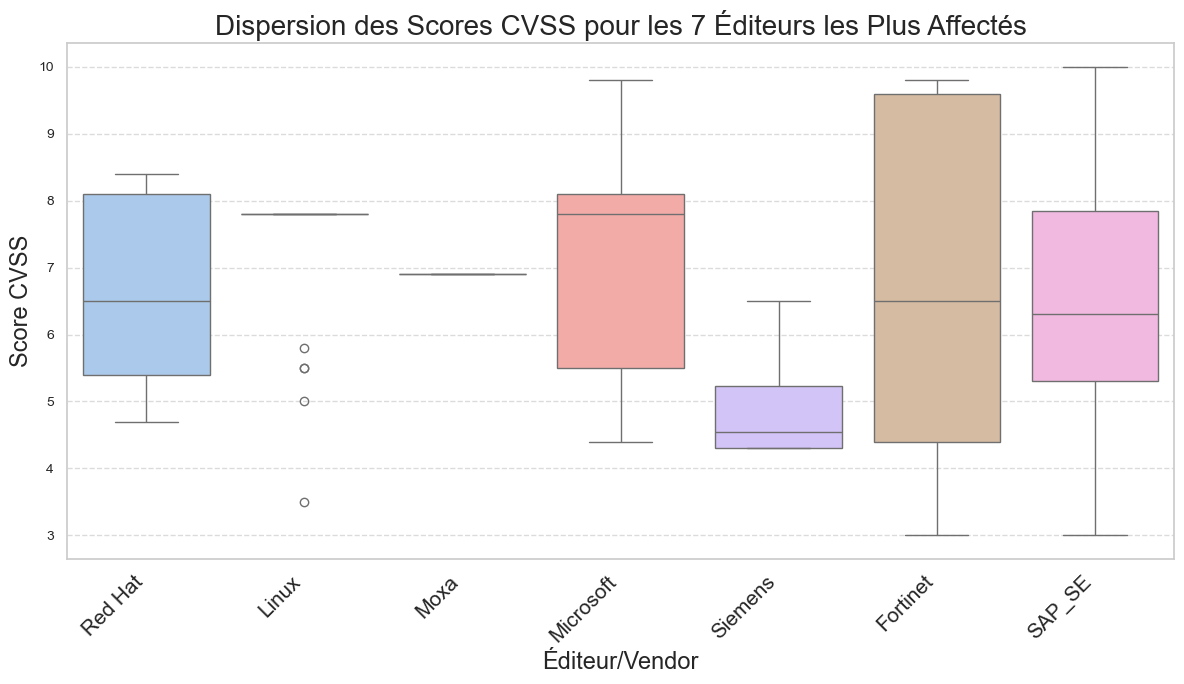

In [38]:
n_top_vendors = 7
top_vendors = df_produit_unique['vendor'].value_counts().head(n_top_vendors).index
df_top_vendors = df_produit_unique[df_produit_unique['vendor'].isin(top_vendors)]
plt.figure(figsize=(12, 7))

sns.boxplot(
    data=df_top_vendors,
    x='vendor',
    y='CVSS_score',
    hue='vendor',
    palette='pastel',
    legend=False
)

plt.title(f'Dispersion des Scores CVSS pour les {n_top_vendors} Éditeurs les Plus Affectés', fontsize=20)
plt.xlabel('Éditeur/Vendor', fontsize=17)
plt.ylabel('Score CVSS', fontsize=17)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Interprétation - Dispersion des scores CVSS pour les 7 éditeurs les plus affectés !!! à refaire

- Cisco se distingue par la gravité médiane la plus élevée de ses vulnérabilités. Linux (avec sa concentration à 7.8) et Microsoft ont également des médianes assez élevées, indiquant une prépondérance de vulnérabilités de haute gravité.
- Siemens présente la gravité la plus basse, avec la plupart de ses vulnérabilités dans la plage "MEDIUM" inférieure.
- Fortinet et SAP_SE montrent une très large dispersion de leurs scores CVSS, ce qui signifie qu'ils ont une gamme variée de vulnérabilités, allant de faibles à très critiques.
- L'aspect inhabituel du boxplot de Linux (pas de boîte visible) reste un point à noter
_____
En somme, ce graphique fournit une vue d'ensemble précieuse sur les profils de gravité des vulnérabilités par éditeur, révélant que certains comme Cisco, Linux et Microsoft traitent majoritairement des vulnérabilités plus graves, tandis que d'autres comme Siemens ont un profil de gravité plus bas.